c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


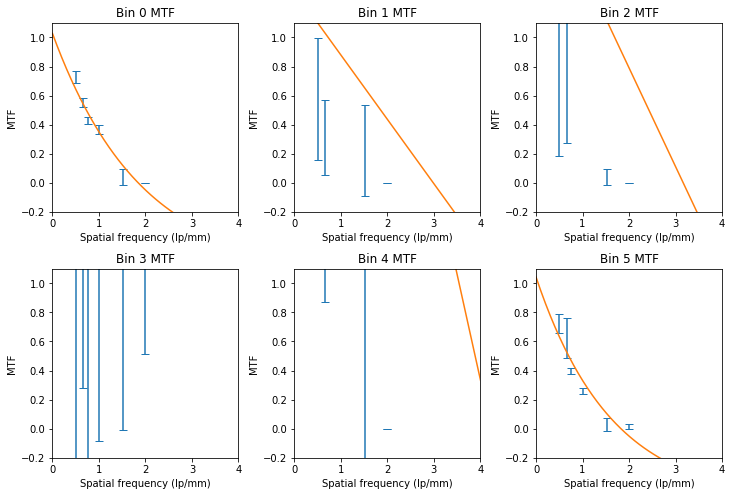

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
# Do a curve fit with exponential
from scipy.optimize import curve_fit

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data'
folder = '21-04-14_CT_bin_width_5'

sub = 'water_phantom'
# sub = 'metal_phantom'

mtf_data = np.load(os.path.join(directory, folder, sub, 'mtf.npy'))

bar_size = np.array([1, 0.75, 0.66, 0.5, 0.33, 0.25])
freq = 1 / (2 * bar_size)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

freq_fit = np.linspace(0, 10, 100)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):

    mtf_mean = mtf_data[i, 0]
    mtf_std = mtf_data[i, 1]

    popt, pcov = curve_fit(func, np.insert(freq, 0, 0), np.insert(mtf_mean, 0, 1))

    # Find the 0.1 spot
    mtf_new = func(freq_fit, *popt)
    idx = np.abs(mtf_new - 0.1).argmin()

    ax.errorbar(freq, mtf_mean, yerr=mtf_std, capsize=4, fmt='none')
    ax.plot(freq_fit, mtf_new)
    ax.set_title(f'Bin {i} MTF')
    ax.set_ylabel('MTF')
    ax.set_xlabel('Spatial frequency (lp/mm)')
    ax.set_xlim([0, 4])
    ax.set_ylim([-0.2, 1.1])

plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.show()
fig.savefig(os.path.join(directory, folder, sub+'_mtf.png'), dpi=500)